In [1]:
import torch
import networkx as nx
import numpy as np
import scipy
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math
from tqdm import tqdm


device = "cuda" if torch.cuda.is_available() else "cpu" 
device

'cuda'

150 200


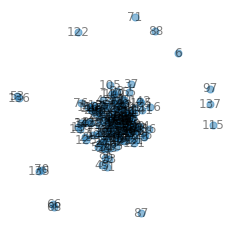

In [2]:
n = 150
m = 1500


# G = nx.Graph(n=11)
# n=11
# G.add_edges_from([(0,1),(0,2),(1,3),(1,4),(2,5),(2,6),(1,7),(1,8),(7,8),(2,9),(2,10),(9,10)])

# G = nx.Graph(n=4)
# n=4
# G.add_edges_from([(0,1),(1,2),(2,0),(2,3)])

#G = nx.karate_club_graph()
#G = nx.florentine_families_graph()
#G = nx.les_miserables_graph();     
#G = nx.davis_southern_women_graph()
#G = nx.random_internet_as_graph(2000)
#G = nx.random_lobster(n,0.3,0.3)
#G = nx.barabasi_albert_graph(150,2)
#G = nx.grid_graph((10,10))
#G = nx.barbell_graph(50, 20)
# G = nx.disjoint_union(nx.cycle_graph(100),nx.path_graph(10))
# G.add_edge(0,100)
# G = nx.Graph(zip(list(range(0,n-1)),list(range(1,n))))
# G.add_edge(0,3)
# G.add_edge(0,99)
# G = nx.ring_of_cliques(3, 10)
#G = nx.connected_caveman_graph(6, 25)
G = nx.gnm_random_graph(150,200) 
#G = nx.watts_strogatz_graph(150,4,0.1) 
#G = nx.Graph([(0,1),(1,2),(1,3),(1,4),(1,5)])
#G = nx.grid_graph((10,15))
# G = nx.random_geometric_graph(1500,0.05,dim=2, pos=None, p=2, seed=None) 


# G = nx.Graph([
#     (0,1),(1,2),(2,3),(3,4),(4,5),(5,0),
#     (6,7),(8,9),
#     (0,6),(0,7),
#     (1,6),(1,8),
#     (2,8),(2,9), 
#     (3,8),(3,7),
#     (4,9),(4,7),
#     (5,9),(5,6)
# ])

# G2 = nx.Graph([
#     (0,1),(1,2),(2,3),(3,4),(4,5),(5,0),
#     (6,7),(8,9),
#     (0,6),(0,9),
#     (1,6),(1,8),
#     (2,7),(2,8), 
#     (3,8),(3,9),
#     (4,9),(4,7),
#     (5,7),(5,6)
# ])
# pos=[(0,10),(5,10),(10,10),(10,0),(5,0),(0,0),(3,6),(3,4),(7,6),(7,4)]


# G = nx.Graph([(i,i+1) for i in range(9)]+[(0,4),(0,5)])
# G2 = nx.Graph([(i,i+1) for i in range(9)]+[(0,4),(4,9)])
# ### https://arxiv.org/abs/1808.04054   Constructing Non-isomorphic Signless Laplacian Cospectral Graphs



# G = nx.Graph([(0,1),(1,2),(2,3),(3,0),(0,4),(0,5),(4,5)])
# G2 = nx.Graph([(0,1),(1,2),(2,3),(3,0),(0,4),(0,5),(4,2)])

G = nx.convert_node_labels_to_integers(G)


n = G.number_of_nodes()
m = G.number_of_edges()
print(n,m)
plt.figure(figsize=(3, 3))
nx.draw(G,with_labels=True, alpha=0.5, node_size=50)


In [3]:
print(nx.laplacian_spectrum(G))

[-1.20531747e-15 -6.64380490e-16 -5.27972672e-16 -4.86425173e-16
 -3.51523924e-16 -1.03439599e-16  1.80211240e-17  9.69521711e-17
  2.96012600e-16  4.69321896e-16  7.09659884e-16  1.14669714e-15
  1.39399244e-01  1.51159963e-01  1.67452834e-01  1.72044813e-01
  1.86109196e-01  2.07881894e-01  2.14021005e-01  2.43541504e-01
  2.61509354e-01  2.94671759e-01  3.09714517e-01  3.56406168e-01
  3.62611419e-01  3.75283818e-01  3.81966011e-01  4.01453012e-01
  4.38137829e-01  4.73946640e-01  4.80628727e-01  5.20497789e-01
  5.58074382e-01  6.30144047e-01  6.79700221e-01  7.04228367e-01
  7.09138827e-01  7.88064506e-01  8.30334054e-01  8.82791330e-01
  9.17279088e-01  9.36966348e-01  9.53520270e-01  9.90753267e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.05336498e+00  1.12895553e+00  1.13434896e+00  1.18218444e+00
  1.24996861e+00  1.35190146e+00  1.36316265e+00  1.40922968e+00
  1.44017794e+00  1.47302

In [4]:
print(nx.adjacency_spectrum(G))

[ 4.10290833e+00+0.00000000e+00j -3.68731380e+00+0.00000000e+00j
 -3.45324110e+00+0.00000000e+00j  3.43625485e+00+0.00000000e+00j
 -3.29268139e+00+0.00000000e+00j  3.26484072e+00+0.00000000e+00j
  3.15133731e+00+0.00000000e+00j -2.95829394e+00+0.00000000e+00j
 -2.97020724e+00+0.00000000e+00j -2.87919971e+00+0.00000000e+00j
 -2.82421191e+00+0.00000000e+00j -2.75367534e+00+0.00000000e+00j
  2.97153450e+00+0.00000000e+00j  2.85526458e+00+0.00000000e+00j
  2.82976764e+00+0.00000000e+00j -2.66694840e+00+0.00000000e+00j
  2.71723713e+00+0.00000000e+00j -2.53716180e+00+0.00000000e+00j
 -2.50235329e+00+0.00000000e+00j  2.68183417e+00+0.00000000e+00j
  2.58101866e+00+0.00000000e+00j  2.48010612e+00+0.00000000e+00j
 -2.39614555e+00+0.00000000e+00j -2.37399391e+00+0.00000000e+00j
 -2.33256707e+00+0.00000000e+00j -2.28333195e+00+0.00000000e+00j
  2.43429028e+00+0.00000000e+00j -2.19282013e+00+0.00000000e+00j
 -2.16635373e+00+0.00000000e+00j  2.34205740e+00+0.00000000e+00j
  2.27833556e+00+0.000000

In [5]:
print(sorted(nx.betweenness_centrality(G).values()))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013256545135739764, 0.0018949176667297479, 0.002331934043343439, 0.0033152519729700933, 0.004777056538801505, 0.005729351115257155, 0.006040700336002348, 0.0066479230908761105, 0.006663470757430485, 0.006682689400810207, 0.006871852677221802, 0.007283649901099567, 0.007556921734774083, 0.007628937662494707, 0.007699334041615923, 0.00802263193202791, 0.008602296186188806, 0.008901873415296229, 0.009084695913554973, 0.009197805842101144, 0.009560735231876168, 0.010468114327174727, 0.010491265692607972, 0.01162717454663763, 0.011803486132345194, 0.012028541223172092, 0.01215309269000544, 0.01215309269000544, 0.01215309269000544, 0.01215309269000544, 0.01215309269000544, 0.01215309269000544, 0.01215309269000544, 0.013247043783956539, 0.013297357760445005, 0.0134695

tensor(400.)


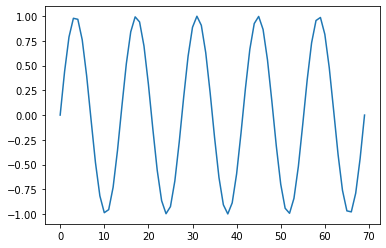

In [6]:

l = 10000
##---------------------------------------
sig = torch.linspace(0, 10*math.pi, 70)
sig = sig.sin()
plt.plot(sig)
# ---------------------------------------
#sig = torch.zeros(l)
#sig[0]=1
# sig[1]=-1
#---------------------------------------
#sig = torch.randn((l,n))


Adj = nx.adjacency_matrix(G).toarray()
Adj = torch.Tensor(Adj)
#Adj = Adj + torch.eye(n)
#Adj = (Adj / Adj.sum(dim=0)).T
print(Adj.sum())

S = torch.zeros((1,n))
S[0,0] = 1

Snew = S
Sold = S
dS = dSold = torch.zeros((n,n))
M = torch.zeros((n,n))

a=1

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

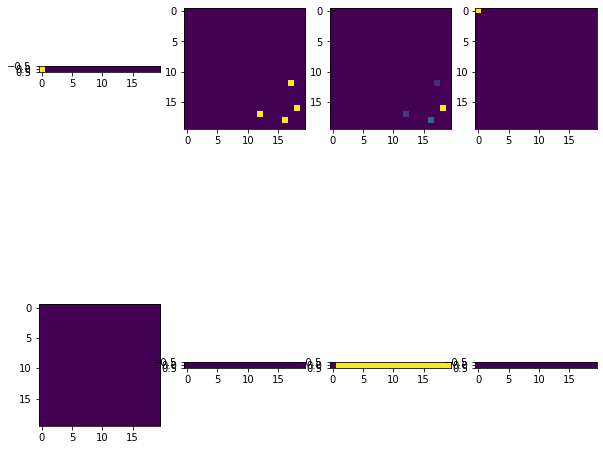

In [7]:
Sold = S
S = Snew

plt.figure(2,figsize=(10, 10))
plt.subplot(241)
plt.imshow(S.numpy()[0:20,0:20])

plt.subplot(242)
plt.imshow(Adj.numpy()[0:20,0:20])

dS = (Adj / (Adj.sum(dim=0)+1E-32)).T
plt.subplot(243)
plt.imshow(dS.numpy()[0:20,0:20])

D = torch.diag(S.squeeze())
plt.subplot(244)
plt.imshow(D.numpy()[0:20,0:20])

dS = D.mm(dS) + a*M
plt.subplot(245)
plt.imshow(dS.numpy()[0:20,0:20])

plt.subplot(246)
plt.imshow(dS.sum(dim=0).unsqueeze(dim=0).numpy()[0:20,0:20])

plt.subplot(247)
plt.imshow((- dS.sum(dim=1)).unsqueeze(dim=0).numpy()[0:20,0:20])

Snew = S + dS.sum(dim=0) - dS.sum(dim=1)
M = dS
plt.subplot(248)
plt.imshow(Snew.numpy()[0:20,0:20])
print(Snew)
print(Snew.sum())

In [8]:
class SignalPropagation(torch.nn.Module):
    def __init__(self, sig, momentum=0.999, response_len=10000, tqdm=lambda x:x, device="cpu"):
        super(SignalPropagation, self).__init__()
        self._device = device
        self._a = momentum
        self._len = response_len
        self._sig = sig.to(self._device)
        self._sig_loop = len(sig)
        self._tqdm = tqdm

    def forward(self, A):
        n  = len(A)
        P = torch.ones((n,n)).to(self._device)
        Snew = Sold = S = torch.zeros((1,n)).to(self._device)
        dS = dSold = torch.zeros((n,n)).to(self._device)
        M = torch.zeros((n,n)).to(self._device)

        response = []
        for i in self._tqdm(range(0,self._len)):
            Sold = S
            S = Snew
            dSold = dS
            S += sig[i % (self._sig_loop-1)]
            response.append(S)
            dS = (A / (A.sum(dim=0)+1E-32)).T
            D = torch.diag(S.squeeze())
            dS = D.mm(dS) + self._a*M
            Snew = S + dS.sum(dim=0) - dS.sum(dim=1)
            M = dS
        response = torch.stack(response).squeeze().T
        return response

In [9]:
Adj = nx.adjacency_matrix(G).toarray()
Adj = torch.Tensor(Adj)
print(Adj.sum())

with torch.no_grad():
  response = SignalPropagation(sig, momentum=0.0, response_len=10000, tqdm=tqdm)(Adj)


  2%|█▍                                                                          | 194/10000 [00:00<00:05, 1937.14it/s]

tensor(400.)


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2330.70it/s]


torch.Size([150, 10000])


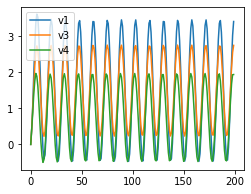

In [10]:
sound = (response.T - response.T.mean(dim=0)).T
print(sound.size())
#sound = sound.flatten()

plt.figure(figsize=(4, 3))
plt.plot(response[0][0:200],label="v1")
plt.plot(response[2][0:200],label="v3")
plt.plot(response[3][0:200],label="v4")
plt.legend()

In [11]:
C = nx.betweenness_centrality(G)
C = [(c,v) for v,c in C.items()]
C = sorted(C,reverse=True)
C = [v for c,v in C]
C = torch.tensor(C,dtype=torch.int32)
#reponse = response.index_select(dim=0,index=C)
C

tensor([114,  96,  12,  50,  92, 132,  17, 145, 144,  22,  39, 148, 127,  48,
         59,  64,  44,  57,  69,   9,  90, 133,  49,  84, 108,  78,  83,  36,
         26, 126,  75, 103, 130,  60,  67, 149, 111, 100,  86, 131,  95, 138,
         45, 146, 134,  82, 143,  91,  10,   4,   0,  81,  63,  98,  74,  11,
         61, 109,  41, 124,  27,  18,  65,  21, 117,  47,  56, 129,  62,  30,
         14,  35, 141, 140, 110,  99,  55,  33,  31,  15,  85,   7,  40,  80,
         20, 102,  24,   2, 104, 113, 147,   8, 101,  54, 118,  38,  73,  79,
         72,   5, 128,  94,  77, 121,  93, 142, 139, 137, 136, 135, 125, 123,
        122, 120, 119, 116, 115, 112, 107, 106, 105,  97,  89,  88,  87,  76,
         71,  70,  68,  66,  58,  53,  52,  51,  46,  43,  42,  37,  34,  32,
         29,  28,  25,  23,  19,  16,  13,   6,   3,   1], dtype=torch.int32)

In [12]:
C = nx.eigenvector_centrality_numpy(G)
print(C)
C = [(c,v) for v,c in C.items()]
C = sorted(C,reverse=True)
C = [v for c,v in C]
C = torch.tensor(C,dtype=torch.int32)
#reponse = response.index_select(dim=0,index=C)
C

{0: 0.06397081492508451, 1: 0.01754168817020742, 2: 0.036389145344869915, 3: 0.009713270241122472, 4: 0.05281403957228335, 5: 0.030389137328701955, 6: -2.4481228363789392e-18, 7: 0.09053455216077834, 8: 0.02301998447174681, 9: 0.11427038822468501, 10: 0.03178579519895633, 11: 0.1580356578660778, 12: 0.07418780165413044, 13: 0.0023484245206765084, 14: 0.06570062477091251, 15: 0.06721724953876344, 16: 0.007681217273293033, 17: 0.0842362225134669, 18: 0.031515330305882966, 19: 0.012797346265583149, 20: 0.03376048380472308, 21: 0.038809981966530405, 22: 0.13080601818613377, 23: 0.017035427646524427, 24: 0.013498233406839321, 25: 0.05285067889678547, 26: 0.09776335495111525, 27: 0.009514743711066705, 28: 0.018081759512035583, 29: 0.007747137559970384, 30: 0.09962947256577528, 31: 0.013685305251467293, 32: 0.011960495435268685, 33: 0.01529547769226789, 34: 0.00333551329043934, 35: 0.03575228888221813, 36: 0.0398526573468534, 37: 0.00404012844143119, 38: 0.06388497303122606, 39: 0.21684149049

tensor([114,  50, 132,  57,  39,  67,  96,  83, 144,  45,  11,  22,  84,  49,
         40,  44, 108,  64,   9,  90, 100, 103,  30, 127,  26,  80,  92, 113,
        117, 149,   7,  82,  17,  41,  60,  47, 130, 138,  12,  69,  98, 145,
         79,  15, 148,  14,  62,   0,  38,  93,  95,  48, 133, 104,  25,   4,
         75, 101,  59,  63,  61,  81, 126,  86, 102,  94,  91, 146, 131, 124,
        134,  72, 129,  36,  74,  21, 118, 109,  56,   2,  35,  78,  20,  73,
        147,  10,  18, 141,   5, 121,  65,  77,  42, 111,   8,  54, 128,  85,
        110,  28, 106, 112,   1,  89,  23,  55,  33,  99,  31,  24,  19,  58,
        140,  32, 125, 142, 120, 107,  46,   3, 143, 119,  27, 123,  29,  16,
        116,  76,  37,  51,  43,  34, 105,  13, 139,  52,  70, 135,  88, 122,
         66, 115, 137,  97,  68,  87,  71,   6, 136,  53], dtype=torch.int32)

In [13]:
print(response[:,-1])
V = response[:,-1]
print(V / V.sum())

tensor([ 3.0000,  1.2697,  2.3743,  1.2649,  3.1019,  2.4091,  3.9386,  3.5833,
         2.6019,  5.0895,  5.1499,  4.9662, 12.4020,  1.5775,  3.9053,  3.6899,
         1.2250,  8.5140,  4.2350,  1.2921,  3.9171,  4.0914,  6.9958,  1.1253,
         2.8768,  0.9383,  5.1179,  4.6295,  1.2544,  1.5636,  5.1073,  3.4816,
         1.1675,  3.2496,  1.6570,  5.4880,  7.4427,  1.6690,  3.6712,  7.6766,
         3.6249,  6.4616,  1.0915,  1.5106,  6.8718,  4.8485,  1.2649,  3.7479,
         7.8660,  6.4666,  8.8576,  1.5106,  1.3631,  3.9386,  2.5535,  3.4734,
         3.9739,  6.0412,  1.2921,  5.4861,  3.8904,  4.0360,  3.6305,  3.9389,
         5.8162,  2.9165,  3.9386,  4.8948,  3.9386,  5.9336,  3.9386,  3.9386,
         2.4475,  2.4292,  5.4156,  6.0960,  1.5466,  2.5029,  4.5172,  2.5833,
         2.4009,  4.1183,  3.7101,  6.4934,  4.9902,  4.1809,  5.5114,  3.9386,
         3.9386,  1.2697,  3.9209,  4.9714,  7.0803,  2.2881,  2.3491,  3.8673,
         8.5952,  3.9386,  5.4496,  3.24

tensor(1.)
tensor([  0.0000,  65.9602, 184.4416,  ..., 643.7448, 650.5723, 590.8123])


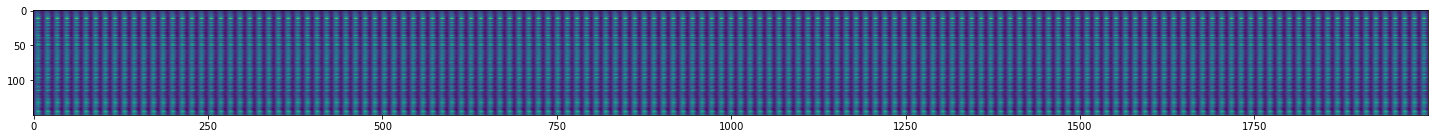

In [14]:
print(S.sum())
plt.figure(figsize=(25, 10))
plt.imshow(response[:,:2000].numpy())
print(response.sum(dim=0))

In [15]:
response.size()

torch.Size([150, 10000])

In [16]:
Adj = nx.adjacency_matrix(G).toarray()
Adj = torch.Tensor(Adj)
print(Adj.sum())

with torch.no_grad():
    response = SignalPropagation(sig, momentum=0.9, response_len=10000, tqdm=tqdm)(Adj)


  4%|██▋                                                                         | 353/10000 [00:00<00:02, 3529.97it/s]

tensor(400.)


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3551.13it/s]


torch.Size([150, 10000])


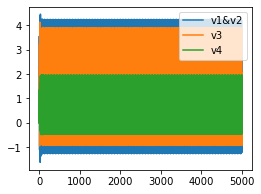

In [17]:
sound = (response.T - response.T.mean(dim=0)).T
print(sound.size())
#sound = sound.flatten()

plt.figure(figsize=(4, 3))
plt.plot(response[0][0:5000],label="v1&v2")
plt.plot(response[2][0:5000],label="v3")
plt.plot(response[3][0:5000],label="v4")
plt.legend()

In [18]:
Adj = nx.adjacency_matrix(G).toarray()
Adj = torch.Tensor(Adj)
print(Adj.sum())

with torch.no_grad():
    response = SignalPropagation(sig, momentum=0.999, response_len=10000, tqdm=tqdm)(Adj)


  4%|██▋                                                                         | 352/10000 [00:00<00:02, 3485.24it/s]

tensor(400.)


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3497.12it/s]


torch.Size([150, 10000])


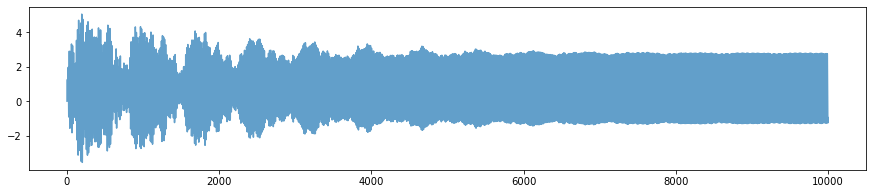

In [20]:
sound = (response.T - response.T.mean(dim=0)).T
print(sound.size())
#sound = sound.flatten()

plt.figure(figsize=(15, 3))
#plt.plot(response[0][0:10000],label="v1",alpha=0.7)
#plt.plot(response[2][0:10000],label="v3",alpha=0.7)
plt.plot(response[3][0:10000],label="v4",alpha=0.7)
#plt.legend()

In [21]:
import numpy as np
from scipy.io.wavfile import write

data = sound.flatten().numpy()
scaled = np.int16(data/np.max(np.abs(data)) * 32767)
write('test.wav', 11025, scaled)

tensor([-9.4295e-01+0.0000e+00j, -9.2237e-01+0.0000e+00j,
        -9.1462e-01+0.0000e+00j, -9.0899e-01+0.0000e+00j,
         1.0000e+00+0.0000e+00j,  9.2831e-01+0.0000e+00j,
         9.1970e-01+0.0000e+00j, -8.9993e-01+0.0000e+00j,
        -8.9307e-01+0.0000e+00j, -8.9004e-01+0.0000e+00j,
        -8.7709e-01+0.0000e+00j, -8.7098e-01+0.0000e+00j,
         9.0584e-01+0.0000e+00j, -1.0000e+00+0.0000e+00j,
        -8.5856e-01+0.0000e+00j,  8.9666e-01+0.0000e+00j,
         8.8984e-01+0.0000e+00j, -8.4723e-01+0.0000e+00j,
         1.0000e+00+0.0000e+00j,  8.8575e-01+0.0000e+00j,
         8.8151e-01+0.0000e+00j, -8.3545e-01+0.0000e+00j,
        -8.1587e-01+0.0000e+00j, -8.2765e-01+0.0000e+00j,
         8.6185e-01+0.0000e+00j,  8.5556e-01+0.0000e+00j,
         8.7314e-01+0.0000e+00j, -7.9775e-01+0.0000e+00j,
        -7.8318e-01+0.0000e+00j, -7.7470e-01+0.0000e+00j,
         8.3360e-01+0.0000e+00j,  8.2589e-01+0.0000e+00j,
        -1.0000e+00+0.0000e+00j,  1.0000e+00+0.0000e+00j,
        -7.498

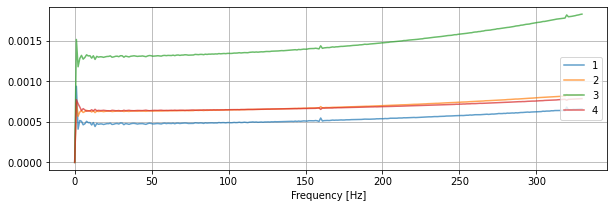

In [22]:
from scipy.fft import fft, ifft, fftfreq

plt.figure(figsize=(10,3))

for i in range(0,4):
    x = sound[i].numpy()
    N = len(x)
    T = 1.0 / 11025
    yf = fft(x)
    xf = fftfreq(N, T)[:N//2]
    xf = xf[0:300]
    yf = yf[0:300]
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), label=i+1, alpha=0.7)

    
A = torch.tensor(nx.adjacency_matrix(G).toarray())
dS = (A / (A.sum(dim=0)+1E-32)).T
X = torch.linalg.eig(dS).eigenvalues
print(X)
X = sorted([abs(x)*5512.5/2 for x in X])[:]
Y = [-0.02]*15
#plt.scatter(X,Y,marker="|",label="scaled eigenvalues")


plt.grid()
plt.xlabel('Frequency [Hz]')
plt.legend(loc="center right")
plt.show()

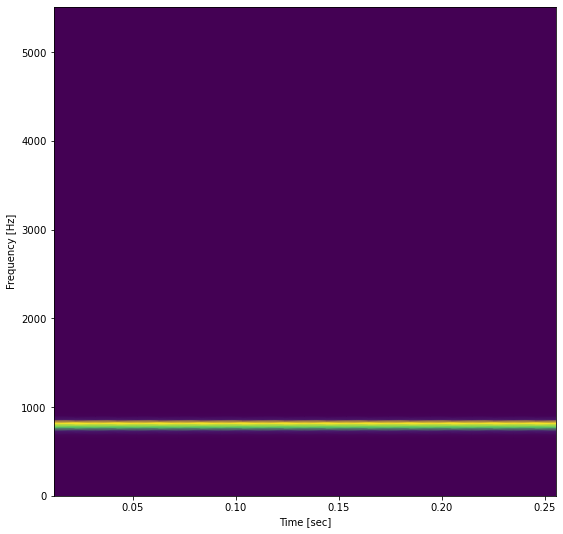

In [23]:
from scipy import signal

f, t, Sxx = signal.spectrogram(sound[70].flatten()[0:3000], 11025)
plt.figure(1,figsize=(9,9))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [24]:
from IPython.display import Audio

Audio(data=scaled[:200000],rate=11025)